# Develop a hand gesture recognition model that can accurately identify and classify different hand gestures from image or video data, enabling intuitive human-computer interaction and gesture-based control systems.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [12]:
import tensorflow as tf
import numpy as np
import cv2
import os
from google.colab.patches import cv2_imshow
from sklearn.model_selection import train_test_split

# Loading Modles and Labels

In [13]:
def load_images_from_folder(folder_path, label):
    images, labels = [], []
    for filename in os.listdir(folder_path):
        path = os.path.join(folder_path, filename)
        img = cv2.imread(path)
        if img is not None:
            img = cv2.resize(img, (224, 224))
            img = img / 255.0
            images.append(img)
            labels.append(label)
    return images, labels


In [14]:
base_dir = '/content/drive/MyDrive/HandGestures'
categories = os.listdir(base_dir)

all_images, all_labels = [], []

for idx, category in enumerate(categories):
    folder_path = os.path.join(base_dir, category)
    imgs, lbls = load_images_from_folder(folder_path, idx)
    all_images += imgs
    all_labels += lbls

X = np.array(all_images)
y = tf.keras.utils.to_categorical(all_labels)


In [25]:
labels_path = '/content/drive/MyDrive/converted_keras/labels.txt'
with open(labels_path, 'r') as file:
    class_names = file.read().splitlines()

# Train/Test Split

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build the Model

In [16]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(224, 224, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(len(categories), activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [9]:
base_model = tf.keras.applications.MobileNetV2(weights='imagenet', include_top=False, input_shape=(224,224,3))
base_model.trainable = False

model = tf.keras.Sequential([
    base_model,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(len(categories), activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


# Train the Model

In [17]:
model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step - accuracy: 0.2222 - loss: 1.4537 - val_accuracy: 0.0000e+00 - val_loss: 35.6139
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.3333 - loss: 14.7518 - val_accuracy: 0.0000e+00 - val_loss: 36.4776
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.3333 - loss: 22.3363 - val_accuracy: 0.0000e+00 - val_loss: 17.1749
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.3333 - loss: 12.4104 - val_accuracy: 0.0000e+00 - val_loss: 5.0353
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.3333 - loss: 4.4039 - val_accuracy: 0.0000e+00 - val_loss: 2.2210
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.4444 - loss: 2.2750 - val_accuracy: 0.0000e+00 - val_loss: 1.8506
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.3333 - loss: 1.6974 - val_accuracy: 0.0000e+00 - val_loss: 1.6889
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.5556 - loss: 1.1277 - val_accuracy: 0.0000e+

# Save the Model

In [18]:
model.save('/content/drive/MyDrive/converted_keras/keras_model.h5')
with open('/content/drive/MyDrive/converted_keras/labels.txt', 'w') as f:
    for label in categories:
        f.write(label + "\n")

# Prediction on Image

In [19]:
def preprocess_image(image, target_size=(224, 224)):
    image = cv2.resize(image, target_size)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = np.array(image, dtype=np.float32) / 255.0
    return np.expand_dims(image, axis=0)

def predict(image, model):
    preprocessed = preprocess_image(image)
    return model.predict(preprocessed)

def get_prediction_label(predictions, class_names):
    idx = np.argmax(predictions)
    return class_names[idx], predictions[0][idx]

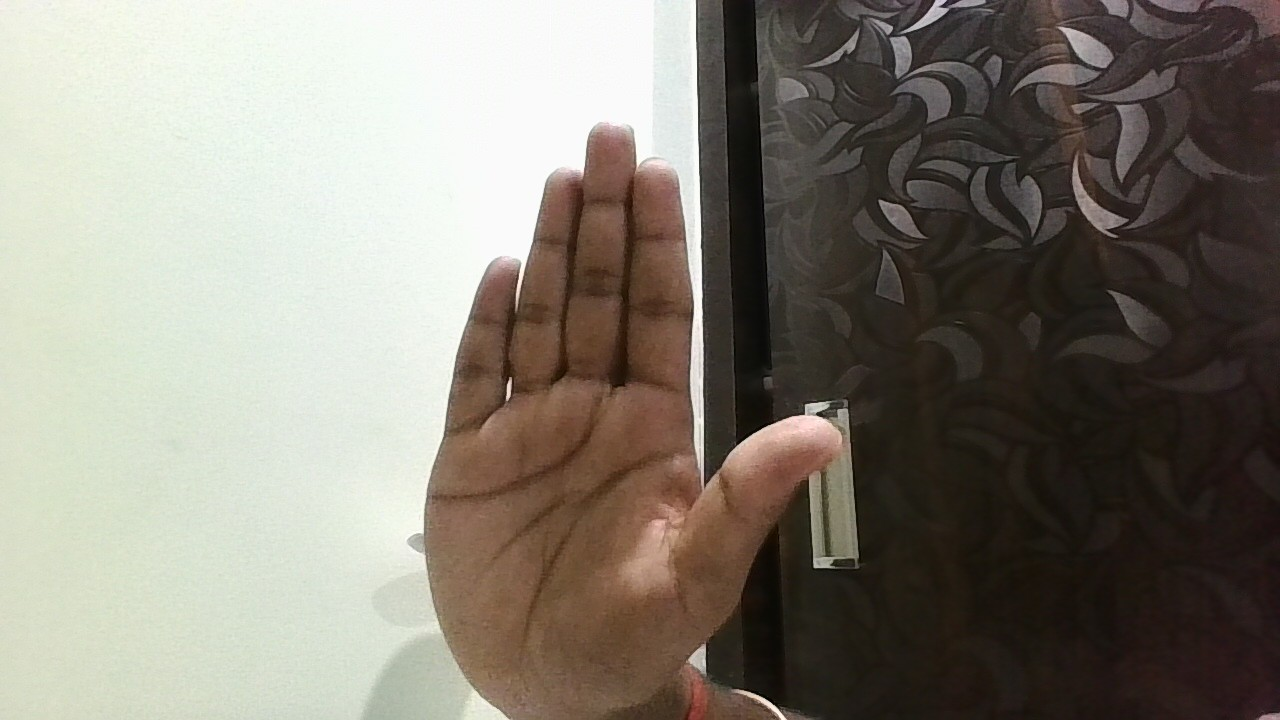

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step
Predicted Label: Palm , Confidence: 0.56


In [28]:
image_path = '/content/drive/MyDrive/img.jpg'
image = cv2.imread(image_path)

cv2_imshow(image)

predictions = predict(image, model)
predicted_label, confidence = get_prediction_label(predictions, class_names)

print(f'Predicted Label: {predicted_label}, Confidence: {confidence:.2f}')